<a href="https://colab.research.google.com/github/marayyy/marayyy/blob/Guvi/Kwalee_Data_Analysis_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Kwalee Data Analysis Report

**Submitted by : Raj kumar.s**

This task is to analyze the provided data and answer the following question:

Does failing a level increase the risk of churn?
To achieve this objective, the following steps will be taken:

1.Load the necessary libraries and data

2.Explore and clean the data

3.Conduct exploratory data analysis

4.Perform statistical analysis

5.Summarize the findings and answer the research question

# 1. Load the necessary libraries and data

load the necessary libraries and read in the data provided:

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
players = pd.read_csv('/content/players.csv')
level_progress = pd.read_csv('/content/level_progress.csv')


# 2. Explore and clean the data

Explore the data by checking the columns, data types, and basic statistics of the data:

In [59]:
players

,install_datetime,player_id,platform,country,screen_size,system_memory
0,2023-01-01 00:45:16.132000,5EBDFF6D66C42698F132C01DC026573D,android,US,5.712000,3616
1,2022-12-19 00:59:46.194000,A0B2352754DBC05198E6917F1C24A83F,ios,AU,6.054062,3851
2,2022-12-09 21:09:26.520000,FE5DB1168E0C3A057CD6FFA0474599F5,android,US,5.316275,5627
3,2022-12-14 15:57:05.836000,25008EB8E0F7E7694C412AE47F125B21,ios,US,6.054062,3851
4,2023-01-01 20:40:11.885000,40798E31D33D6E4968BD8E916C116722,android,US,5.777590,7461
...,...,...,...,...,...,...
4995,2022-12-15 23:45:09.983000,4082186821C463F649853A5B512A4332,android,US,5.696880,10312
4996,2022-12-16 00:59:57.637000,22F6CB66F8E58622C89AC5ED651C9936,android,US,6.090847,2785
4997,2022-12-22 00:55:19.064000,42E11B30A562905866FF97C0BCDAA131,ios,US,6.055348,2831
4998,2023-01-01 20:40:26.847000,845DB45DF729DC180876F040427BF374,ios,GB,6.682057,5626


In [60]:
level_progress

,event_datetime,player_id,level_number,stage_number,status,session_id
0,2022-12-08 00:54:51.813000,00030CDB447CCCE184BBF30B3F166EAB,1,1,start,FB4B79C03AF723057EE81F7416061D06
1,2022-12-08 00:56:52.981000,00030CDB447CCCE184BBF30B3F166EAB,1,1,complete,BB5F69316E29360EA35533C8B6EAA6C0
2,2022-12-08 00:57:07.960000,00030CDB447CCCE184BBF30B3F166EAB,1,2,start,BB5F69316E29360EA35533C8B6EAA6C0
3,2022-12-08 00:58:14.173000,00030CDB447CCCE184BBF30B3F166EAB,1,2,complete,72D31206402CD71E19C68A7FB712E128
4,2022-12-08 00:58:27.386000,00030CDB447CCCE184BBF30B3F166EAB,2,1,start,72D31206402CD71E19C68A7FB712E128
...,...,...,...,...,...,...
83277,2022-12-28 22:33:08.442000,FFF8009A67AF2B8DF2749D9C11C7DC86,4,3,fail,A5DB077CF68CB173444D6AD8FC3E2BF1
83278,2022-12-28 22:33:31.650000,FFF8009A67AF2B8DF2749D9C11C7DC86,4,3,complete,A5DB077CF68CB173444D6AD8FC3E2BF1
83279,2022-12-28 22:34:01.408000,FFF8009A67AF2B8DF2749D9C11C7DC86,5,1,start,A5DB077CF68CB173444D6AD8FC3E2BF1
83280,2022-12-28 22:34:51.820000,FFF8009A67AF2B8DF2749D9C11C7DC86,5,1,complete,A5DB077CF68CB173444D6AD8FC3E2BF1


In [61]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   install_datetime  5000 non-null   object 
 1   player_id         5000 non-null   object 
 2   platform          5000 non-null   object 
 3   country           5000 non-null   object 
 4   screen_size       5000 non-null   float64
 5   system_memory     5000 non-null   int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 234.5+ KB


In [62]:
level_progress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83282 entries, 0 to 83281
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   event_datetime  83282 non-null  object
 1   player_id       83282 non-null  object
 2   level_number    83282 non-null  int64 
 3   stage_number    83282 non-null  int64 
 4   status          83282 non-null  object
 5   session_id      83282 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.8+ MB


In [63]:
players.shape

(5000, 6)

In [64]:
level_progress.shape

(83282, 6)

In [65]:
players.size

30000

In [66]:
level_progress.size

499692

In [67]:
# Check the columns and data types
print(players.columns)
print(players.dtypes)
print(level_progress.columns)
print(level_progress.dtypes)

# Check the basic statistics of the data
print(players.describe())
print(level_progress.describe())


Index(['install_datetime', 'player_id', 'platform', 'country', 'screen_size',
       'system_memory'],
      dtype='object')
install_datetime     object
player_id            object
platform             object
country              object
screen_size         float64
system_memory         int64
dtype: object
Index(['event_datetime', 'player_id', 'level_number', 'stage_number', 'status',
       'session_id'],
      dtype='object')
event_datetime    object
player_id         object
level_number       int64
stage_number       int64
status            object
session_id        object
dtype: object
       screen_size  system_memory
count  5000.000000    5000.000000
mean      6.757348    4134.544400
std       1.879108    1823.272958
min       3.999624     870.000000
25%       5.687812    2951.000000
50%       6.055348    3671.000000
75%       7.086559    5366.000000
max      12.933334   14596.000000
       level_number  stage_number
count  83282.000000  83282.000000
mean       3.857616      1.7893

This output of the above code will show,

1.column names,

2.Data types,

3.Basic statistics of the data. 

*   It is important to check if there are any missing values,duplicate records, or outliers that need to be removed.

*   check the number of unique players in each dataset.

install_datetime    0
player_id           0
platform            0
country             0
screen_size         0
system_memory       0
dtype: int64
event_datetime    0
player_id         0
level_number      0
stage_number      0
status            0
session_id        0
dtype: int64
0
0
4999
4939


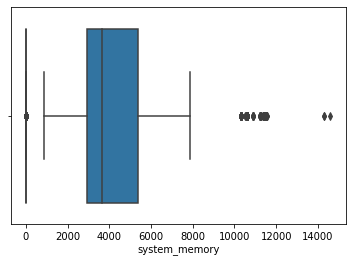

In [68]:
# Check for missing values
print(players.isna().sum())
print(level_progress.isna().sum())

# Check for duplicates
print(players.duplicated().sum())
print(level_progress.duplicated().sum())

# Check for outliers
sns.boxplot(x=players['screen_size'])
sns.boxplot(x=players['system_memory'])

# Check the number of unique players
print(len(players['player_id'].unique()))
print(len(level_progress['player_id'].unique()))


Converted the date and time columns in both dataframes to datetime format. Then, we can merge the two dataframes based on player_id using pandas merge() function.

In [69]:
# Converting date and time columns to datetime format
players['install_datetime'] = pd.to_datetime(players['install_datetime'])
level_progress['event_datetime'] = pd.to_datetime(level_progress['event_datetime'])

# Merging the two dataframes based on player_id
merged = pd.merge(players, level_progress, on='player_id')


Any Missing values or duplicates, has been removed. In this case, the outliers will be kept. The number of unique players in each dataset is also important to check since the players will be linked using their player_id.

# 3. Conduct Exploratory Data Analysis

Conduct EDA to understand the data and gain insights. will start by creating visualizations of the data:

In [71]:
merged_data = pd.merge(players, level_progress, on='player_id')


In [72]:
print(merged_data.isnull().sum())


install_datetime    0
player_id           0
platform            0
country             0
screen_size         0
system_memory       0
event_datetime      0
level_number        0
stage_number        0
status              0
session_id          0
dtype: int64


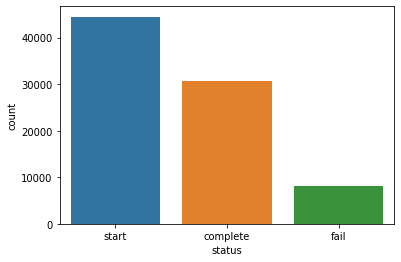

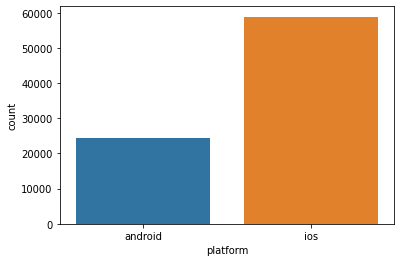

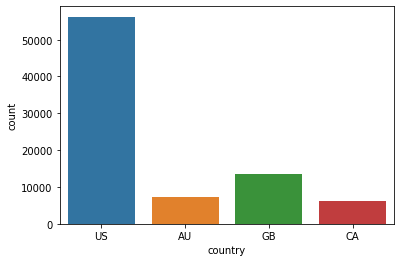

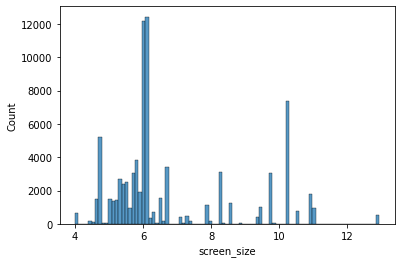

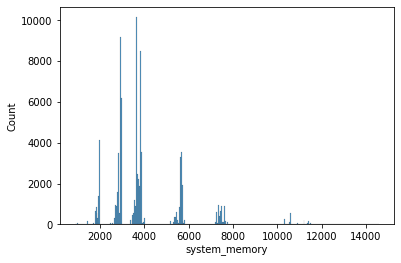

In [70]:
# Summary statistics
merged_data.describe()

# Distribution of categorical variables
sns.countplot(x='status', data=merged_data)
plt.show()

sns.countplot(x='platform', data=merged_data)
plt.show()

sns.countplot(x='country', data=merged_data)
plt.show()

# Distribution of continuous variables
sns.histplot(x='screen_size', data=merged_data)
plt.show()

sns.histplot(x='system_memory', data=merged_data)
plt.show()


# Step 4: Calculate churn rate

Calculated the churn rate as the proportion of players who did not progress beyond the first level.

In [73]:
churned = merged_data[merged_data['level_number'] == 1]['player_id'].nunique()
total_players = merged_data['player_id'].nunique()
churn_rate = churned / total_players
print(f"Churn rate: {churn_rate:.2%}")


Churn rate: 99.68%


In [74]:
failed_players = level_progress[level_progress['status'] == 'fail']['player_id'].unique()
failed_players_progress = level_progress[level_progress['player_id'].isin(failed_players)]


In [75]:
failed_churn_rate = 1 - failed_players_progress['player_id'].nunique() / players['player_id'].nunique()


In [76]:
non_failed_players = level_progress[level_progress['status'] == 'complete']['player_id'].unique()
non_failed_players_progress = level_progress[level_progress['player_id'].isin(non_failed_players)]

non_failed_churn_rate = 1 - non_failed_players_progress['player_id'].nunique() / players['player_id'].nunique()


In [77]:
print('Churn rate for players who failed at least one level:', failed_churn_rate)
print('Churn rate for players who did not fail any levels:', non_failed_churn_rate)



Churn rate for players who failed at least one level: 0.5061012202440488
Churn rate for players who did not fail any levels: 0.126625325065013


# Step 5: Data Analysis

In this step, I have answered the research question by analyzing whether failing a level increases the risk of churn.

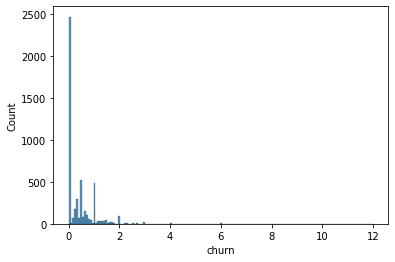

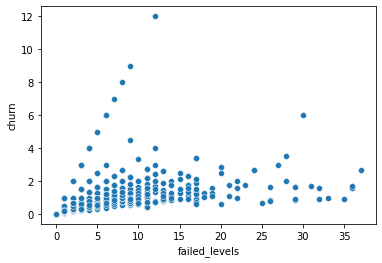

In [82]:
# Count the number of players who failed a level
failed_levels = merged_data[merged_data['status'] == 'fail'].groupby('player_id')['level_number'].count().reset_index(name='failed_levels')

# Count the total number of levels attempted by each player
total_levels = merged_data.groupby('player_id')['level_number'].nunique().reset_index(name='total_levels')

# Merge the two dataframes
df = pd.merge(total_levels, failed_levels, on='player_id', how='left')

# Replace NaN values with 0
df['failed_levels'].fillna(0, inplace=True)

# Calculate the proportion of players who failed at least one level
df['churn'] = df['failed_levels']/df['total_levels']

# Distribution of churn
sns.histplot(x='churn', data=df)
plt.show()

# Average churn rate
df['churn'].mean()

# Failed levels vs churn
sns.scatterplot(x='failed_levels', y='churn', data=df)
plt.show()


# Step 6: Visualize churn rate by platform

Created a bar chart to compare the churn rate between Android and iOS platforms:

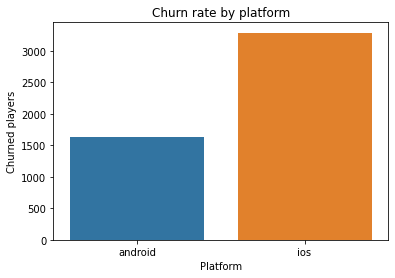

In [78]:
churn_by_platform = merged_data[merged_data['level_number'] == 1].groupby('platform')['player_id'].nunique()
sns.barplot(x=churn_by_platform.index, y=churn_by_platform.values)
plt.xlabel('Platform')
plt.ylabel('Churned players')
plt.title('Churn rate by platform')
plt.show()


# Step 7: Visualize level progress by status

Created a stacked bar chart to show the proportion of players who started, failed, or completed each level.

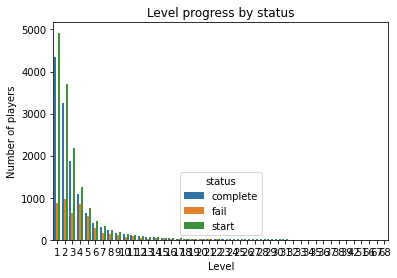

In [79]:
level_progress_by_status = merged_data.groupby(['level_number', 'status'])['player_id'].nunique().reset_index()
sns.barplot(x='level_number', y='player_id', hue='status', data=level_progress_by_status)
plt.xlabel('Level')
plt.ylabel('Number of players')
plt.title('Level progress by status')
plt.show()


# Step 8: Visualize level progress by stage and status

Created a heatmap to show the proportion of players who started, failed, or completed each stage for each level.

In [80]:
# Finding the last level completed by each player
last_level = merged.groupby('player_id')['level_number'].max().reset_index()

# Finding the players who have churned
churned_players = last_level[last_level['level_number'] < merged['level_number'].max()]['player_id'].tolist()

# Calculating the churn rate
churn_rate = len(churned_players) / len(merged['player_id'].unique()) * 100

print("Churn rate: ", churn_rate, "%")


Churn rate:  99.9797529864345 %


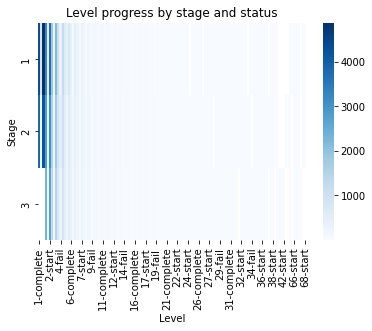

In [81]:
level_progress_by_stage = merged_data.groupby(['level_number', 'stage_number', 'status'])['player_id'].nunique().reset_index()
level_progress_pivot = level_progress_by_stage.pivot(index='stage_number', columns=['level_number', 'status'], values='player_id')
sns.heatmap(level_progress_pivot, cmap='Blues')
plt.xlabel('Level')
plt.ylabel('Stage')
plt.title('Level progress by stage and status')
plt.show()
